In [167]:
import pandas as pd
# /home/deepak/Projects and Coursework/CS399/JMLR/Master/polire/testdata/
df = pd.read_csv("../../../testdata/30-03-18.csv")

In [168]:
df.columns

Index(['Unnamed: 0', 'location', 'parameter', 'value', 'latitude',
       'longitude'],
      dtype='object')

In [169]:
points = np.array(df[['latitude', 'longitude']])

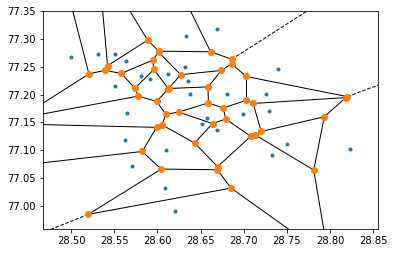

array([[28.60540833, 77.14553751],
       [28.59899854, 77.14118658],
       [28.42496478, 77.1476994 ],
       [28.53119482, 77.44399716],
       [27.65219708, 80.45234361],
       [28.43996118, 77.72369124],
       [28.43989892, 77.15737336],
       [28.52063739, 77.23722527],
       [28.79820368, 76.90707827],
       [28.68529402, 77.03206564],
       [28.66934155, 77.06503954],
       [28.82000206, 77.19638772],
       [28.81831942, 77.19473757],
       [28.58229514, 77.09783153],
       [28.60433618, 77.06621471],
       [28.52002282, 76.98492841],
       [28.1098407 , 77.01447057],
       [28.58870324, 77.29787171],
       [28.54218943, 77.25207318],
       [28.53923457, 77.24369466],
       [28.57779031, 77.19735159],
       [28.79333631, 77.16025715],
       [28.78111206, 77.06446481],
       [28.64298368, 77.11304581],
       [28.66969269, 77.070684  ],
       [28.70296255, 77.23258817],
       [28.55809303, 77.23805462],
       [28.57388231, 77.21158149],
       [28.5943241 ,

In [170]:
import numpy as np
# points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
#                    [2, 0], [2, 1], [2, 2],  [3,2],[2,3]])
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points,incremental=True)
# Plot it:
import matplotlib.pyplot as plt
voronoi_plot_2d(vor)
plt.show()
vor.vertices

In [46]:
len(vor.vertices)

52

In [63]:
vor.regions

[[],
 [6, 2, -1, 5],
 [10, 3, 1, 9],
 [19, 17, 16, 18],
 [18, -1, 0, 16],
 [19, 9, 1, -1, 18],
 [21, 11, 8, 6, 2, 20],
 [22, 11, 21],
 [26, 20, 21, 22, 24],
 [26, 20, 2, -1, 1, 3, 25],
 [30, 4, 28, 27, 29],
 [32, 5, -1, 4, 30],
 [33, 12, 7, 8, 6, 5, 32],
 [35, 13, 15, 14, 34],
 [36, 10, 9, 19, 17, 13, 35],
 [40, 38, 37, 39],
 [38, 23, 25, 26, 24, 37],
 [39, 7, 8, 11, 22, 24, 37],
 [44, 42, 41, 43],
 [43, 15, 13, 17, 16, 0, 41],
 [42, 28, 4, -1, 0, 41],
 [44, 27, 28, 42],
 [44, 27, 29, 31, 14, 15, 43],
 [51, 46, 45, 47, 48, 49, 50],
 [46, 33, 32, 30, 29, 31, 45],
 [47, 34, 14, 31, 45],
 [51, 12, 33, 46],
 [48, 36, 35, 34, 47],
 [49, 23, 25, 3, 10, 36, 48],
 [50, 40, 38, 23, 49],
 [51, 12, 7, 39, 40, 50]]

In [67]:
testing = []
for i in vor.regions:
    if 13 in i and 17 in i:
        testing.append(i)

In [74]:
testing

[[36, 10, 9, 19, 17, 13, 35], [43, 15, 13, 17, 16, 0, 41]]

In [71]:
[vor.vertices[i ] for i in testing]

[array([[28.60540833, 77.14553751],
        [28.59899854, 77.14118658],
        [28.58229514, 77.09783153],
        [28.60433618, 77.06621471],
        [28.66934155, 77.06503954],
        [28.66969269, 77.070684  ],
        [28.64298368, 77.11304581]]), array([[28.71347373, 77.12743911],
        [28.70816431, 77.12503195],
        [28.66969269, 77.070684  ],
        [28.66934155, 77.06503954],
        [28.68529402, 77.03206564],
        [28.79820368, 76.90707827],
        [28.78111206, 77.06446481]])]

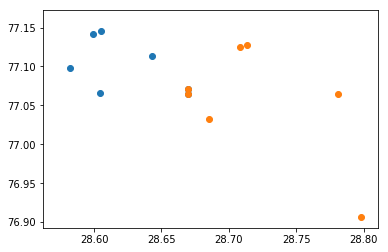

In [73]:
plt.scatter(vor.vertices[testing[0]][:,0], vor.vertices[testing[0]][0:,1])
plt.scatter(vor.vertices[testing[1]][:,0], vor.vertices[testing[1]][0:,1])

In [58]:
new = []
for i in vor.regions:
    if -1 not in i and i!=[]:
        new.append(i)

In [60]:
vor.vertices[new[0]]

array([[28.59899854, 77.14118658],
       [28.42496478, 77.1476994 ],
       [28.1098407 , 77.01447057],
       [28.58229514, 77.09783153]])

In [208]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

point = Point(0, 0)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
print(polygon.contains(point))

False


In [210]:
polygon.intersects(point)

True

In [64]:
point_to_region = {'regions':vor.regions, 'real_vertices':5,1:2}


In [97]:
from shapely.geometry import Polygon
p1 = Polygon([(0,0), (1,1), (1,0)])
p2 = Polygon([(0,1), (1,0), (1,1)])
print(p1.intersects(p2))


True


In [98]:
p1 = Polygon(list(map(tuple,vor.vertices[testing[1]])))


In [99]:
p2 = Polygon(list(map(tuple,vor.vertices[testing[1]])))

In [100]:
p1.intersects(p2)

True

In [669]:
def order_poly(vertices):
    """This function essentially is used to order the vertices
    of the Voronoi polygon in a clockwise manner. 
    
    Arguments
    ---------
    vertices : 2D Array 
    This contains the list of vertices of the Polygon to be sorted
    
    Returns
    -------
    new_vertices : 2D Array
    All the vertices reordered in a clockwise manner
    """
    mean_x = np.mean(vertices[:,0])
    mean_y = np.mean(vertices[:,1])
    
    def condition(x):
        """This is the condition to be used while sorting. We convert the coordinates
        to Polar and sort the points
        """
        return atan2(x[0] - mean_x, x[1] - mean_y)*180/np.pi
    return sorted(vertices, key=condition)

In [716]:
data = {i:(df.iloc[i]['longitude'],df.iloc[i]['latitude']) for i in range(len(df))}
vertices = np.array([data[i] for i in data])
vor = Voronoi(np.array([data[i] for i in data]), incremental=True)
curr_vertices = vor.vertices
regions = vor.regions
curr_regions = []
for i in regions:
    if i!=[] and -1 not in i:
        curr_regions.append(i)
vertex_poly_map = {i:0 for i in range(30)}
for i in range(len(vertices)):
    point = Point(data[i][0], data[i][1])
    for j in range(len(curr_regions)):
        p = Polygon(order_poly((vor.vertices[curr_regions[j]])))
        if p.contains(point):
            vertex_poly_map[i] = p
for i in range(len(vertex_poly_map)):
    if vertex_poly_map[i]==0:
        vertex_poly_map.pop(i, None)

# voronoi_plot_2d(vor)

vor.add_points([[ 77.2,28.62]])
vor.close()
new_regions = vor.regions
final_regions = []
for i in new_regions:
    if i!=[] and -1 not in i:
        final_regions.append(i)
        
new_vertices = vor.vertices
# old = []
# for i in range(len(curr_vertices)):
#     if curr_vertices[i] not in new_vertices:
#         old.append(curr_vertices[i])
new = []
for i in range(len(new_vertices)):
    if new_vertices[i] not in curr_vertices:
        new.append(new_vertices[i])

old_polygons = []
for i in vertex_poly_map:
    for j in new:
        if vertex_poly_map[i].intersects(Point(tuple(j))):
            old_polygons.append(i)
old_polygons = np.unique(old_polygons)
old_polygons = [vertex_poly_map[i] for i in old_polygons]
# x, y = old_polygons[0].exterior.coords.xy

xff = []
xf = []
yf = []
for j in range(len(old_polygons)):
    x,y = old_polygons[j].exterior.coords.xy
    for i in range(len(x)):
        xf.append(x[i])
        yf.append(y[i])
    xff.append([xf,yf])
    xf=[]
    yf=[]
new = np.array(new)
# final_polygon = 
# new = []
# for i in range(len(new)):
#     new[i] = list(new[i])
# new.sort()
# new = np.array(new)
# print(new)
# plt.scatter(np.array(new)[:,0],np.array(new)[:,1],label='new1',c='black')
# plt.xlim(28.6,28.7)
# for i in range(len(xff)):
#     plt.plot(xff[i][0],xff[i][1],label=str(i))
# plt.scatter(28.65, 77.1)
# plt.legend()

In [717]:
data

{0: (77.234291, 28.581196999999996),
 1: (77.245721, 28.739434000000003),
 2: (77.101961, 28.822931),
 3: (76.991463, 28.620805999999998),
 4: (77.03254129999998, 28.60909),
 5: (77.07219599999999, 28.570859000000002),
 6: (77.1670103, 28.5646102),
 7: (77.1180053, 28.562776300000003),
 8: (77.27240400000001, 28.530782000000002),
 9: (77.26075, 28.563827000000003),
 10: (77.0996943, 28.610304),
 11: (77.2273074, 28.5918245),
 12: (77.09210999999999, 28.732219),
 13: (77.317084, 28.668671999999997),
 14: (77.15854470000002, 28.6573814),
 15: (77.20115729999998, 28.6802747),
 16: (77.237372, 28.612561),
 17: (77.305651, 28.632707),
 18: (77.1473105, 28.6514781),
 19: (77.16481999999999, 28.699253999999996),
 20: (77.170221, 28.728721999999998),
 21: (77.2005604, 28.6372688),
 22: (77.20115729999998, 28.7256504),
 23: (77.136777, 28.669119),
 24: (77.267246, 28.499679999999998),
 25: (77.2494387, 28.6316945),
 26: (77.27357370000001, 28.5512005),
 27: (77.2159377, 28.5504249),
 28: (77.11

In [712]:
# area = []
weights = {}
pf = Polygon(order_poly(new))
total_area = pf.area
for i in vertex_poly_map:
    if pf.intersects(vertex_poly_map[i]):
        try:
            weights[i] = (pf.intersection(vertex_poly_map[i])).area/total_area
#             area.append((pf.intersection(vertex_poly_map[i]).area))
        except:
            "fail"

In [714]:
weights

{6: 0.1317819986668561,
 11: 0.1719999134949305,
 14: 0.00217909152999757,
 16: 0.017151558618760426,
 18: 0.038894575710331024,
 21: 0.6048516810850266,
 29: 0.03314118089407444}

In [715]:
vertex_poly_map

{0: <shapely.geometry.polygon.Polygon at 0x7fa326ce5630>,
 4: <shapely.geometry.polygon.Polygon at 0x7fa326ce57f0>,
 6: <shapely.geometry.polygon.Polygon at 0x7fa326ce56a0>,
 7: <shapely.geometry.polygon.Polygon at 0x7fa326ce5860>,
 8: <shapely.geometry.polygon.Polygon at 0x7fa326ce58d0>,
 9: <shapely.geometry.polygon.Polygon at 0x7fa326ce5940>,
 10: <shapely.geometry.polygon.Polygon at 0x7fa326ce55c0>,
 11: <shapely.geometry.polygon.Polygon at 0x7fa326ce5550>,
 12: <shapely.geometry.polygon.Polygon at 0x7fa326ce5a20>,
 14: <shapely.geometry.polygon.Polygon at 0x7fa326ce59b0>,
 15: <shapely.geometry.polygon.Polygon at 0x7fa326ce5a90>,
 16: <shapely.geometry.polygon.Polygon at 0x7fa326ce5b70>,
 17: <shapely.geometry.polygon.Polygon at 0x7fa326ce5be0>,
 18: <shapely.geometry.polygon.Polygon at 0x7fa326ce5c50>,
 19: <shapely.geometry.polygon.Polygon at 0x7fa326ce5cc0>,
 20: <shapely.geometry.polygon.Polygon at 0x7fa326ce5b00>,
 21: <shapely.geometry.polygon.Polygon at 0x7fa326ce5da0>,
 22

In [698]:
(pf.intersection(vertex_poly_map[i])).area

5.7817478531032744e-05

In [692]:
area

[]

In [611]:
new

[array([77.19348259, 28.58636262]),
 array([77.15710162, 28.60803082]),
 array([77.21733174, 28.60947697]),
 array([77.16785277, 28.62602659]),
 array([77.17105938, 28.62958266]),
 array([77.21892568, 28.61748459]),
 array([77.21198353, 28.62825461])]

In [612]:
for i in range(len(new)):
    new[i] = list(new[i])
# new.sort()
new = np.array(new)

In [295]:
pf = Polygon(list(map(tuple,new)))

In [328]:
for i in vertex_poly_map:
    if pf.intersects(vertex_poly_map[i]):
        try:
            print(pf.intersection(vertex_poly_map[i]))
        except:
            "fail"

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 28.652315347945468 77.116115799548268 at 28.652315347945468 77.116115799548268
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 28.652315347945468 77.116115799548268 at 28.652315347945468 77.116115799548268
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 28.652315347945468 77.116115799548268 at 28.652315347945468 77.116115799548268
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 28.652315347945468 77.116115799548268 at 28.652315347945468 77.116115799548268
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 28.652315347945468 77.116115799548268 at 28.652315347945468 77.116115799548268


In [314]:
val = vertex_poly_map[0].intersection(vertex_poly_map[4])

shapely.geometry.collection.GeometryCollection

In [308]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))
PolyArea(new[:,0],new[:,1])

0.0019011780332220951

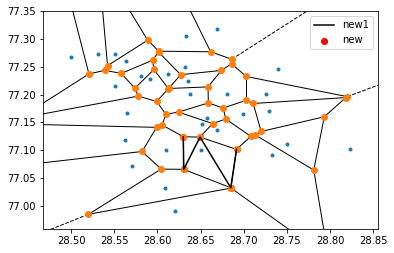

In [301]:
voronoi_plot_2d(vor)
plt.plot(np.array(new)[:,0],np.array(new)[:,1],label='new1',c='black')
plt.scatter(np.array(new)[:,0],np.array(new)[:,1],label='new',c='red')
plt.legend()
plt.show()


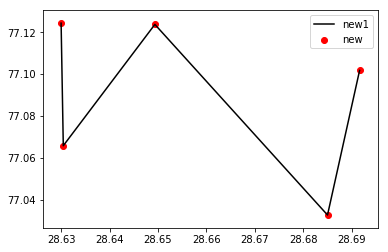

In [298]:
plt.plot(np.array(new)[:,0],np.array(new)[:,1],label='new1',c='black')
plt.scatter(np.array(new)[:,0],np.array(new)[:,1],label='new',c='red')
plt.legend()

In [197]:
vertex_poly_map = {i:0 for i in range(30)}
for i in range(len(vertices)):
    point = Point(data[i][0], data[i][1])
    for j in range(len(final_regions)):
        p = Polygon(list(map(tuple,vor.vertices[final_regions[j]])))
        if p.contains(point):
            vertex_poly_map[i] = p
for i in range(len(vertex_poly_map)):
    if vertex_poly_map[i]==0:
        vertex_poly_map.pop(i, None)

In [198]:
polygon_intersection = {i:[] for i in vertex_poly_map}
for i in vertex_poly_map:
    for j in vertex_poly_map:
        if vertex_poly_map[i].intersects(vertex_poly_map[j]) and i!=j:
            polygon_intersection[i].append(j)

In [199]:
new_point = Point(28.65, 77.10)

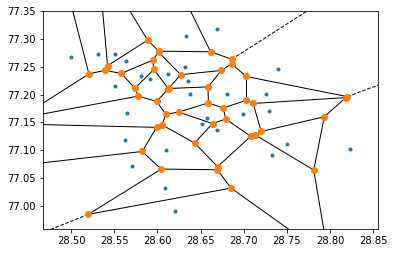

In [200]:
voronoi_plot_2d(vor)
plt.show()

In [153]:
for i in vertex_poly_map:
    if vertex_poly_map[i].contains(new_point):
        print(i)

10


In [154]:
polygon_intersection[10]

[4, 6, 7, 12, 18, 23]

In [224]:
x, y = vertex_poly_map[0].exterior.coords.xy

In [ ]:
new_vertices_for_voronoi

In [201]:
vor.add_points([[28.65, 77.10]])

In [202]:
new_regions = []
regions = vor.regions
final_regions = []
for i in regions:
    if i!=[] and -1 not in i:
        final_regions.append(i)

In [179]:
final_regions

[[10, 3, 1, 9],
 [19, 17, 16, 18],
 [21, 11, 8, 6, 2, 20],
 [22, 11, 21],
 [26, 20, 21, 22, 24],
 [30, 4, 28, 27, 29],
 [33, 12, 7, 8, 6, 5, 32],
 [35, 13, 15, 14, 34],
 [36, 10, 9, 19, 17, 13, 35],
 [40, 38, 37, 39],
 [38, 23, 25, 26, 24, 37],
 [39, 7, 8, 11, 22, 24, 37],
 [44, 42, 41, 43],
 [43, 15, 13, 17, 16, 0, 41],
 [44, 27, 28, 42],
 [44, 27, 29, 31, 14, 15, 43],
 [51, 46, 45, 47, 48, 49, 50],
 [46, 33, 32, 30, 29, 31, 45],
 [47, 34, 14, 31, 45],
 [51, 12, 33, 46],
 [48, 36, 35, 34, 47],
 [49, 23, 25, 3, 10, 36, 48],
 [50, 40, 38, 23, 49],
 [51, 12, 7, 39, 40, 50]]

In [186]:
for i in vor.vertices:
    for 

array([[28.60540833, 77.14553751],
       [28.59899854, 77.14118658],
       [28.42496478, 77.1476994 ],
       [28.53119482, 77.44399716],
       [27.65219708, 80.45234361],
       [28.43996118, 77.72369124],
       [28.43989892, 77.15737336],
       [28.52063739, 77.23722527],
       [28.79820368, 76.90707827],
       [28.68529402, 77.03206564],
       [28.82000206, 77.19638772],
       [28.81831942, 77.19473757],
       [28.58229514, 77.09783153],
       [28.60433618, 77.06621471],
       [28.52002282, 76.98492841],
       [28.1098407 , 77.01447057],
       [28.58870324, 77.29787171],
       [28.54218943, 77.25207318],
       [28.53923457, 77.24369466],
       [28.57779031, 77.19735159],
       [28.79333631, 77.16025715],
       [28.78111206, 77.06446481],
       [28.70296255, 77.23258817],
       [28.55809303, 77.23805462],
       [28.57388231, 77.21158149],
       [28.5943241 , 77.26183987],
       [28.59596067, 77.2451799 ],
       [28.68611768, 77.26361822],
       [28.68583167,

In [183]:
final_regions[0] in new_regions

False

In [204]:
new_vertices = vor.vertices
old = []
for i in range(len(curr_vertices)):
    if curr_vertices[i] not in new_vertices:
        old.append(curr_vertices[i])
new = []
for i in range(len(new_vertices)):
    if new_vertices[i] not in curr_vertices:
        new.append(new_vertices[i])

In [205]:
new

[array([28.69165169, 77.10170496]),
 array([28.63041463, 77.06574326]),
 array([28.68502269, 77.03262647]),
 array([28.62996365, 77.12430433]),
 array([28.64934467, 77.12369881])]

In [207]:
old

[array([28.66934155, 77.06503954]),
 array([28.64298368, 77.11304581]),
 array([28.66969269, 77.070684  ])]

In [213]:
len(curr_vertices)

52

In [214]:
len(new_vertices)

54

In [233]:
old_polygons = []
for i in vertex_poly_map:
    for j in new:
        if vertex_poly_map[i].intersects(Point(tuple(j))):
            old_polygons.append(i)
old_polygons = np.unique(old_polygons)

In [234]:
old_polygons = [vertex_poly_map[i] for i in old_polygons]

In [235]:
x, y = old_polygons[0].exterior.coords.xy

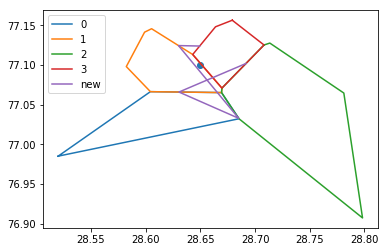

In [267]:
xff = []
xf = []
yf = []
for j in range(len(old_polygons)):
    x,y = old_polygons[j].exterior.coords.xy
    for i in range(len(x)):
        xf.append(x[i])
        yf.append(y[i])
    xff.append([xf,yf])
    xf=[]
    yf=[]
    
for i in range(len(xff)):
    plt.plot(xff[i][0],xff[i][1],label=str(i))
plt.scatter(28.65, 77.1)
plt.plot(np.array(new)[:,0],np.array(new)[:,1],label='new')
plt.legend()

In [256]:
xff

[[[28.52002282017353,
   28.68529402093843,
   28.669341545092845,
   28.6043361827753,
   28.52002282017353,
   (array('d', [28.52002282017353, 28.68529402093843, 28.669341545092845, 28.6043361827753, 28.52002282017353]),
    array('d', [76.98492840530152, 77.03206563805365, 77.06503953874967, 77.06621471349769, 76.98492840530152])),
   (array('d', [28.52002282017353, 28.68529402093843, 28.669341545092845, 28.6043361827753, 28.52002282017353]),
    array('d', [76.98492840530152, 77.03206563805365, 77.06503953874967, 77.06621471349769, 76.98492840530152])),
   28.52002282017353,
   28.68529402093843,
   28.669341545092845,
   28.6043361827753,
   28.52002282017353],
  [76.98492840530152,
   77.03206563805365,
   77.06503953874967,
   77.06621471349769,
   76.98492840530152,
   76.98492840530152,
   77.03206563805365,
   77.06503953874967,
   77.06621471349769,
   76.98492840530152]],
 [[28.669692685758605,
   28.669341545092845,
   28.6043361827753,
   28.582295142317207,
   28.5989985

In [250]:
old_polygons[j].exterior.coords.xy

(array('d', [28.52002282017353, 28.68529402093843, 28.669341545092845, 28.6043361827753, 28.52002282017353]),
 array('d', [76.98492840530152, 77.03206563805365, 77.06503953874967, 77.06621471349769, 76.98492840530152]))

In [228]:
new_regions = []
regions = vor.regions
for i in regions:
    if i!=[] and -1 not in i:
        new_regions.append(i)
# p = Polygon(list(map(tuple,vor.vertices[final_regions[j]])))


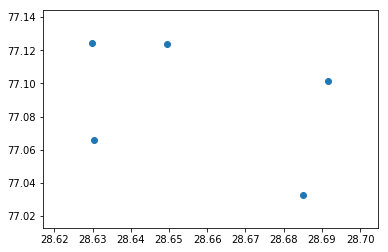

In [182]:
for i in range(len(final_regions)):
    data = final_regions[i]
    if data in new_regions:
        pass
    else:
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [110]:
## First ensure that you map all points to its polygons
## Next when a new point comes -- makes sure you compute its polygon too, by using 

In [321]:
v = pf.intersection(vertex_poly_map[0])

In [323]:
v.area

0.0

In [664]:
p = Polygon([(0,0),(1,1),(0,1),(1,0)])

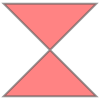

In [665]:
p

In [592]:
q = Polygon([(0.5,0),(1.5,0),(1,0.5)])

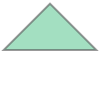

In [593]:
q

In [595]:
r = p.intersection(q)

In [596]:
r.area

0.125

In [597]:
new

[[45.715222832165836, 45.85021427646242],
 [9653.482048454467, 9686.237852172715],
 [144.70839580375286, 145.05802596251397]]

In [529]:
#Borrowed from https://stackoverflow.com/questions/41855695/sorting-list-of-two-dimensional-coordinates-by-clockwise-angle-using-python
import math

pts = [[2,3], [5,2],[4,1],[3.5,1],[1,2],[2,1],[3,1],[3,3],[4,3]]
origin = [2, 3]
refvec = [0, 1]

def clockwiseangle_and_distance(point):
    # Vector between point and the origin: v = p - o
    vector = [point[0]-origin[0], point[1]-origin[1]]
    # Length of vector: ||v||
    lenvector = math.hypot(vector[0], vector[1])
    # If length is zero there is no angle
    if lenvector == 0:
        return -math.pi, 0
    # Normalize vector: v/||v||
    normalized = [vector[0]/lenvector, vector[1]/lenvector]
    dotprod  = normalized[0]*refvec[0] + normalized[1]*refvec[1]     # x1*x2 + y1*y2
    diffprod = refvec[1]*normalized[0] - refvec[0]*normalized[1]     # x1*y2 - y1*x2
    angle = math.atan2(diffprod, dotprod)
    # Negative angles represent counter-clockwise angles so we need to subtract them 
    # from 2*pi (360 degrees)
    if angle < 0:
        return 2*math.pi+angle, lenvector
    # I return first the angle because that's the primary sorting criterium
    # but if two vectors have the same angle then the shorter distance should come first.
    return angle, lenvector



In [614]:
from functools import reduce
import operator
import math
coords = [(0.5,2), (1, 1), (2, 2), (2, 3),(1,3)]
center = tuple(map(operator.truediv, reduce(lambda x, y: map(operator.add, x, y), coords), [len(coords)] * 2))
l = sorted(new, key=lambda coord: (-135 - math.degrees(math.atan2(*tuple(map(operator.sub, coord, center))[::-1]))) % 360)

In [622]:
sorted(new, key=clockwiseangle_and_distance)

[array([77.17105938, 28.62958266]),
 array([77.16785277, 28.62602659]),
 array([77.21198353, 28.62825461]),
 array([77.15710162, 28.60803082]),
 array([77.21892568, 28.61748459]),
 array([77.21733174, 28.60947697]),
 array([77.19348259, 28.58636262])]

In [623]:
vor.vertices

array([[76.90707827, 28.79820368],
       [77.01447057, 28.1098407 ],
       [77.09783153, 28.58229514],
       [77.070684  , 28.66969269],
       [77.44399716, 28.53119482],
       [80.45234361, 27.65219708],
       [77.72369124, 28.43996118],
       [77.23722527, 28.52063739],
       [77.14798084, 28.66384362],
       [77.11304581, 28.64298368],
       [76.98492841, 28.52002282],
       [77.06621471, 28.60433618],
       [77.03206564, 28.68529402],
       [77.06503954, 28.66934155],
       [77.12503195, 28.70816431],
       [77.15622646, 28.67913536],
       [77.29787171, 28.58870324],
       [77.25207318, 28.54218943],
       [77.24369466, 28.53923457],
       [77.23583403, 28.62690266],
       [77.27640965, 28.60131332],
       [77.27809613, 28.6015944 ],
       [77.27701513, 28.66160986],
       [77.26361822, 28.68611768],
       [77.1476994 , 28.42496478],
       [77.15737336, 28.43989892],
       [77.14118658, 28.59899854],
       [77.14553751, 28.60540833],
       [77.12743911,

In [621]:
l

[array([77.17105938, 28.62958266]),
 array([77.16785277, 28.62602659]),
 array([77.21198353, 28.62825461]),
 array([77.15710162, 28.60803082]),
 array([77.21892568, 28.61748459]),
 array([77.21733174, 28.60947697]),
 array([77.19348259, 28.58636262])]

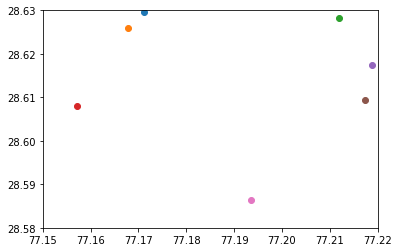

In [624]:
plt.xlim(77.15,77.22)
plt.ylim(28.58,28.63)
plt.scatter(l[0][0],l[0][1])
plt.scatter(l[1][0],l[1][1])
plt.scatter(l[2][0],l[2][1])
plt.scatter(l[3][0],l[3][1])
plt.scatter(l[4][0],l[4][1])
plt.scatter(l[5][0],l[5][1])
plt.scatter(l[6][0],l[6][1])


In [625]:
new

array([[77.19348259, 28.58636262],
       [77.15710162, 28.60803082],
       [77.21733174, 28.60947697],
       [77.16785277, 28.62602659],
       [77.17105938, 28.62958266],
       [77.21892568, 28.61748459],
       [77.21198353, 28.62825461]])

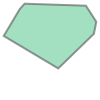

In [626]:
Polygon([new[1],new[3],new[4],new[6],new[5],new[2],new[0]])

In [640]:
mean_x = np.mean(new[:,0])
mean_y = np.mean(new[:,1])

In [641]:
for i in range(len(new)):
    print(atan2(new[i,0]-mean_long, new[i,1]-mean_lat)*180/np.pi)

175.2597681542881
-101.63312077002557
101.95757365011387
-64.69216169871005
-54.02402898416912
84.96042666460296
57.65161841461735


In [648]:
def func(x):
    global mean_x, mean_y
    return atan2(x[0] - mean_x, x[1] - mean_y)*180/np.pi

In [653]:
final = sorted(new, key=func)

In [656]:
final

[array([77.15710162, 28.60803082]),
 array([77.16785277, 28.62602659]),
 array([77.17105938, 28.62958266]),
 array([77.21198353, 28.62825461]),
 array([77.21892568, 28.61748459]),
 array([77.21733174, 28.60947697]),
 array([77.19348259, 28.58636262])]

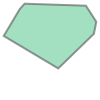

In [657]:
Polygon(final)

In [650]:
[new[1],new[3],new[4],new[6],new[5],new[2],new[0]]

[array([77.15710162, 28.60803082]),
 array([77.16785277, 28.62602659]),
 array([77.17105938, 28.62958266]),
 array([77.21198353, 28.62825461]),
 array([77.21892568, 28.61748459]),
 array([77.21733174, 28.60947697]),
 array([77.19348259, 28.58636262])]

In [580]:
col1 = 0
col2 = 1    
new.T[[col1, col2]] = new.T[[col2, col1]]

In [581]:
new

array([[77.19348259, 28.58636262],
       [77.15710162, 28.60803082],
       [77.21733174, 28.60947697],
       [77.16785277, 28.62602659],
       [77.17105938, 28.62958266],
       [77.21892568, 28.61748459],
       [77.21198353, 28.62825461]])

In [659]:
order_poly(new)

[array([77.15710162, 28.60803082]),
 array([77.16785277, 28.62602659]),
 array([77.17105938, 28.62958266]),
 array([77.21198353, 28.62825461]),
 array([77.21892568, 28.61748459]),
 array([77.21733174, 28.60947697]),
 array([77.19348259, 28.58636262])]

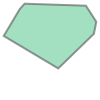

In [660]:
Polygon(order_poly(new))